# Virtual Screening of ZINC Database

ZINC is a free database of commercially-available compounds for virtual screening. It contains over 230 million purchasable compounds.  Because ZINC database is really big, it offers predifined subsets of molecule, i.e "Drug-like", and also the possibility of getting customized subsets based for example on molecular weight and logP.

In this tutorial we will screen a subset of ZINC using an structured-based pharmacophore model.

In [2]:
from openpharmacophore import VirtualScreening
from openpharmacophore import StructuredBasedPharmacophore 

import copy

from rdkit.Chem import Draw

2021-10-26 17:36:48,548 [WARNING] [__init__.py:5] root: Warning: importing 'simtk.openmm' is deprecated.  Import 'openmm' instead.


## Pharmacophore model for Plasmodium Falciparum Triosephosphate isomerase

ZINC database will be screened using an structured-based pharmacophore for this protein whose pdb id is 1M7O. First we derive a pharmacophore model for this protein-ligand complex.

In [20]:
sb_pharmacophore = StructuredBasedPharmacophore().from_pdb("1M7O")
sb_pharmacophore

1M7O PDB contains the following ligands:

3PG:A:5401
3PG:B:6401

Please enter for which one the pharmacophore should be computed 
 3PG:A:5401


StructuredBasedPharmacophore(n_elements: 8)

In [21]:
sb_pharmacophore.elements

[NegativeChargeSphere(center: (5.383, 14.6995, 23.6355); radius: 1.0),
 NegativeChargeSphere(center: (6.27, 18.601, 20.619); radius: 1.0),
 HbAcceptorSphereAndVector(center: (5.628, 13.609, 23.384); radius: 1.0; direction: (-0.7322, 0.5899, -0.3405)),
 HbAcceptorSphereAndVector(center: (4.788, 13.828, 20.872); radius: 1.0; direction: (-0.9704, -0.1994, 0.1361)),
 HbAcceptorSphereAndVector(center: (7.927, 18.277, 20.809); radius: 1.0; direction: (-0.5633, -0.2003, -0.8016)),
 HbAcceptorSphereAndVector(center: (7.927, 18.277, 20.809); radius: 1.0; direction: (-0.9629, -0.2044, 0.176)),
 HbDonorSphereAndVector(center: (4.788, 13.828, 20.872); radius: 1.0; direction: (-0.745, -0.5647, 0.3551)),
 HbDonorSphereAndVector(center: (5.983, 20.171, 21.16); radius: 1.0; direction: (-0.7672, 0.3303, -0.5498))]

In [23]:
# Remove two acceptors
sb_pharmacophore.remove_elements([3, 4])

In [24]:
sb_pharmacophore.show()

NGLWidget()

## Screen ZINC with the pharmacophore model

Now we can use this pharmacophore to screen ZINC database. To do this we will use the VirtualScreening3D class and then call the screen_ZINC method.

ZINC offers different molecules subsets inluding the following: "Drug-Like" ,"Lead-Like" ,"Lugs" ,"Goldilocks" ,"Fragments" ,"Flagments" ,"Big-n-Greasy" ,"Shards". We can pass the name of a subset to the screen_ZINC method. Alternatively, if we don't want any of these subsets, we can pass a molecular weight range and a logP range as a tuple. In this example we are screening the subset of molecules with molecular weight 250-300 and logP 1-2. This is a small subset just for demonstration purposes.

The screen_ZINC method also offers the possibility to download molecule files. In this case we do not want to store any of hese files so we pass None to the download_path argument.

In [27]:
zinc_screener = VirtualScreening(sb_pharmacophore)
zinc_screener.screen_ZINC(
                        download_path=None,
                        subset=None, 
                        mw_range=(250,300), 
                        logp_range=(1,2))

  0%|          | 0/31 [00:00<?, ?it/s]

Processing files...


  0%|          | 0/32 [00:00<?, ?it/s]

Finished screening ZINC database


Once it has finished screening we can print a small report.

In [28]:
zinc_screener.print_report()

Virtual Screening Results
-------------------------

Molecules scanned:                              819,817
Molecules matched to pharmacophore:                  13
Molecules that didn't match the pharmacophore:  819,804
Lowest  SSD value:    12.2852
Highest SSD value:    25.7947
Average SSD value:    20.6324

Top 5 molecules:

ZINCID          SSD
-------       ------
8616921      12.2852
1857533511    14.378
3156219      17.7627
1681378      17.9211
217700852    19.0365



aligned_mols contains all the molecules that matched the pharmacophore with its score and id.

In [29]:
zinc_screener.aligned_mols[0:3]

[(12.285211830870693, '8616921', <rdkit.Chem.rdchem.Mol at 0x7fe1677d9070>),
 (14.378011885907945, '1857533511', <rdkit.Chem.rdchem.Mol at 0x7fe1677d9db0>),
 (17.762709834244973, '3156219', <rdkit.Chem.rdchem.Mol at 0x7fe1677d9730>)]

In [30]:
zinc_screener.save_results_to_file("./screen_results.csv")

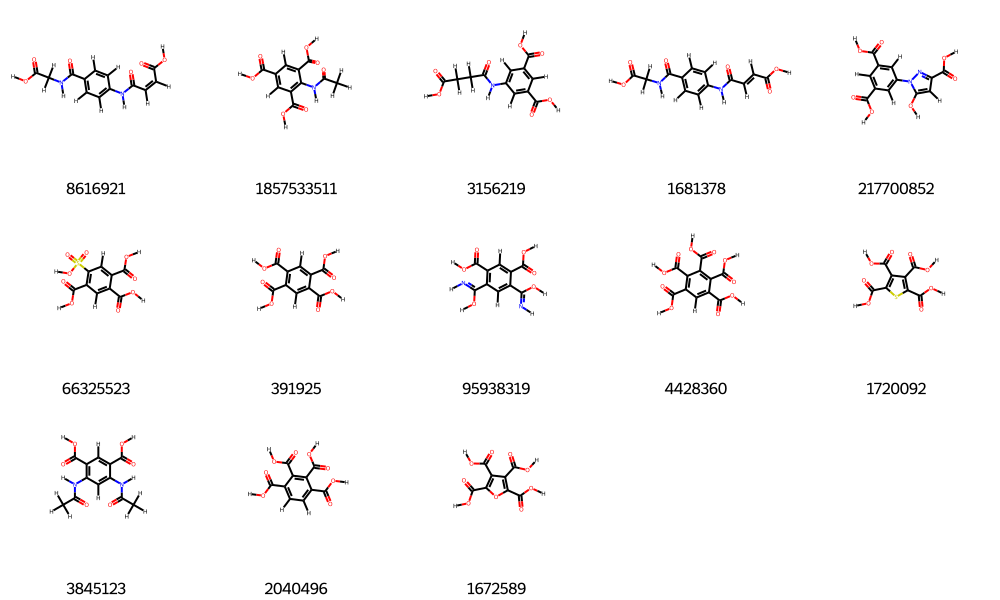

In [34]:
# Visualize Matched molecules
matches = [copy.deepcopy(mol[-1]) for mol in zinc_screener.aligned_mols]
for molecule in matches:
    molecule.RemoveAllConformers()
img = Draw.MolsToGridImage(matches, molsPerRow=5, returnPNG=False, legends=[x.GetProp("_Name") for x in matches])
img